<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

``Для воспроизводимости результатов.``

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [40]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [x] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [x] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [x] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [41]:
display(df_train.columns[df_train.isna().any()])
display(df_test.columns[df_test.isna().any()])

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [42]:
display(df_train.duplicated().any())
display(df_test.duplicated().any())

True

True

In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train)
profile.to_file('profile_report.html') # в коллабе выполняется

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

`Изучив файл, можно сказать, что высокую корреляцию между собой имеют признаки: пробег и год, цена и трансмиссия, цена и год. Признак тип продавца несбалансирован. 7% данных дублицированы.`

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [43]:
display(df_train.describe(exclude='object'))
display(df_test.describe(exclude='object'))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/

              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/

              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [44]:
display(df_train.describe(include='object'))
display(df_test.describe(include='object'))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/

                          name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468  

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/

                       name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57  

``Средние и медианы в трейне и тесте сильно не отличаются, что говорит о том, что данные просплитовали нормальным образом и нет больших смещений, также говорит о низком количестве выбросов в данных.``

### **Задание 3 (0.2 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [x] Отобразите такие объекты (0.05 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [45]:
df_train_no_target = df_train.drop(columns=['selling_price']).copy()
df_train_no_target.duplicated().sum()

1159

In [46]:
df_train_no_target[df_train_no_target.duplicated()].head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/

                                         name  year  km_driven    fuel  \
254                  Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                          Maruti Swift VXI  2012      50000  Petrol   
268                    Maruti Swift Dzire VXI  2014      70000  Petrol   
324  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                             Lexus ES 300h  2019      20000  Petrol   

    seller_type transmission         owner     mileage   engine   max_power  \
254  Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258  Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268  Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324      Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325      Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   

                  torque  seats  
254       114Nm@ 4000rpm    5.0  
258       11

In [47]:
df_train.drop_duplicates(subset=df_train_no_target.columns, keep='first', inplace=True)

In [48]:
df_train.reset_index(inplace=True, drop=True)

In [49]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [50]:
df_train.replace(to_replace=' bhp', value=0, inplace=True)

df_train[['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].apply(
    lambda row: row.str.replace(pat=r'[^\d\.\,]', repl='', regex=True),
    axis=0
)
df_test[['mileage', 'engine', 'max_power']] = df_test[['mileage', 'engine', 'max_power']].apply(
    lambda row: row.str.replace(pat=r'[^\d\.\,]', repl='', regex=True),
    axis=0
)

In [51]:
df_train['mileage'] = df_train['mileage'].astype(float)
df_train['engine'] = df_train['engine'].astype(float)
df_train['max_power'] = df_train['max_power'].astype(float)

df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)

df_test['max_torque_rpm'] = df_test['torque'].str.split().str[1]
df_test['torque'] = df_test['torque'].str.split().str[0]

df_train['max_torque_rpm'] = df_train['torque'].str.split().str[1]
df_train['torque'] = df_train['torque'].str.split().str[0]

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [x] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [x] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою - верный вариант ответа. Мы не можем допустить утечки данных
 - По тренировочным данным для `train` и `test`

In [52]:
df_train[['mileage', 'engine', 'max_power', 'seats']] = df_train[['mileage', 'engine', 'max_power', 'seats']].fillna(
    value=df_train[['mileage', 'engine', 'max_power', 'seats']].median()
)
df_test[['mileage', 'engine', 'max_power', 'seats']] = df_test[['mileage', 'engine', 'max_power', 'seats']].fillna(
    value=df_test[['mileage', 'engine', 'max_power', 'seats']].median()
)

``Медиана более устойчивая к выбросам, но можно было применить и среднее, так как в данных нет явных аномалий``

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.
- [x] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [53]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

`Кол-во сидений можно рассматривать как категориальный признак, так как на основании этого мы можем судить о типе транспортного средства - автобус, спорткар, седан и тд`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [x] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [54]:
df_train.describe()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/

              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000  

`Я не считаю , что заполнение пропусков сдвинуло наши распределения, так как кол-во пропусков было небольшим и медиана не должна привноисть лишний скок нашим распределениям`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [55]:
sns.pairplot(data=df_train)

AttributeError: 'GrouperView' object has no attribute 'join'

`Мы видим высокую линейную зависимость цены продажи от таких признаков: год, пробег, расход топлива, максимальная мощность и кол-во сидений`

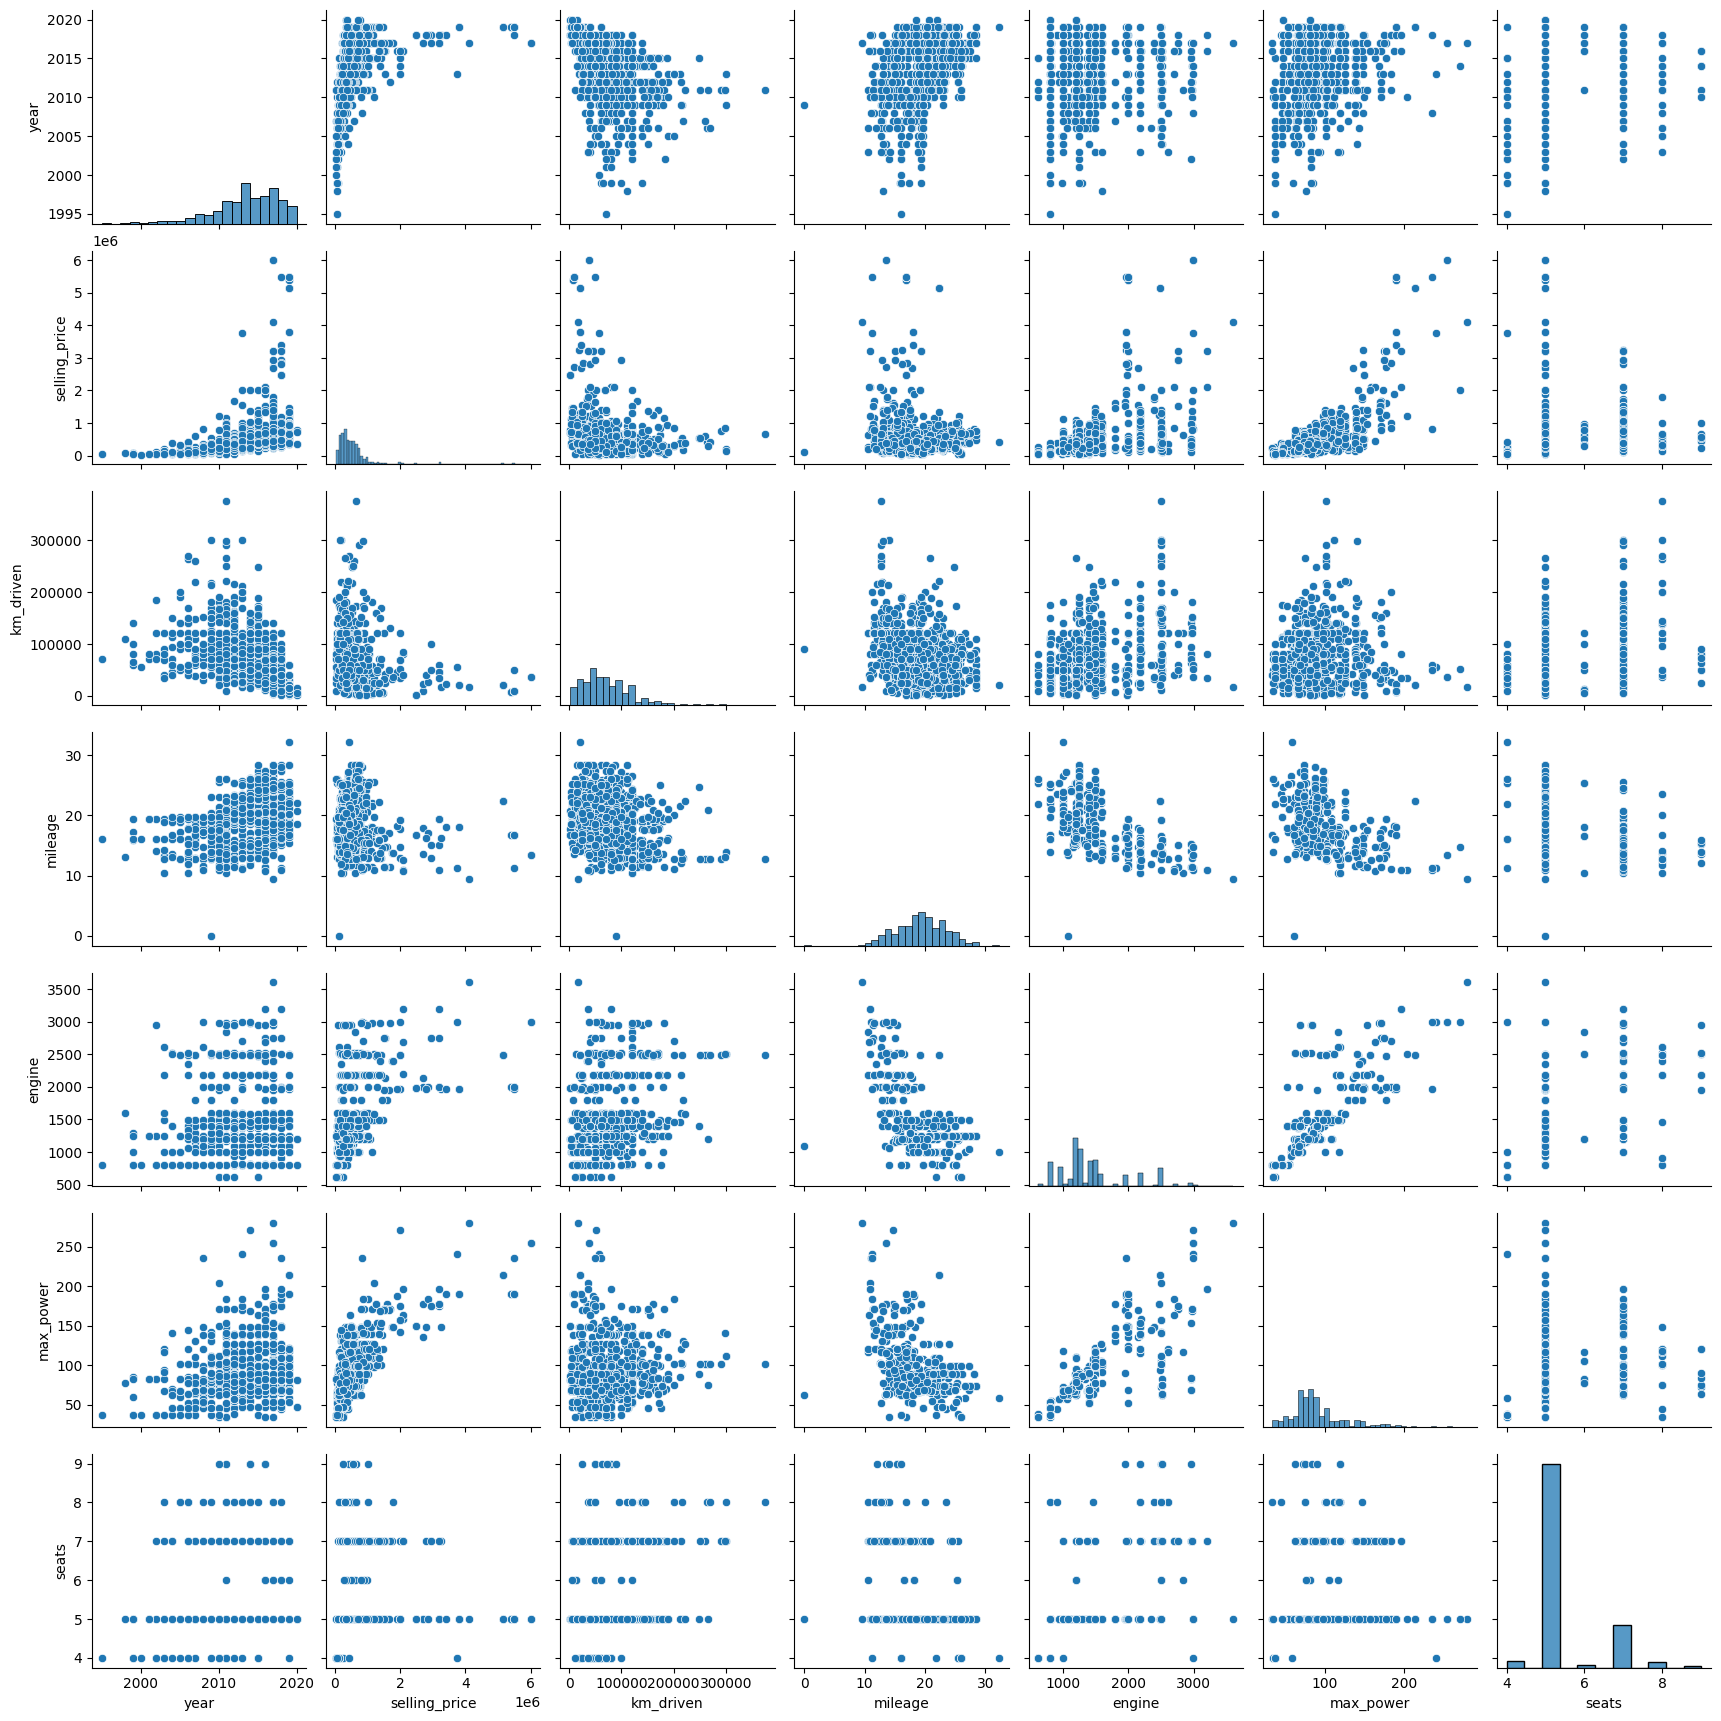

In [20]:
sns.pairplot(data=df_test)

`Распределения оказались с различиями: посмотрим на распределение зависимости цены от пробега и увидим, что они довольно сильно отличаются `

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [56]:
df_train_pearson = df_train.corr(numeric_only=True)
df_train_pearson

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/

                   year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   

               max_power     seats  
year            0.156858  0.041178  
selling_price   0.692814  0.149953  
km_driven       0.024588  0.192328  
mileage        -0.373390 -0.451059  
engine          0.681117  0.652172  
max_power       1.000000  0.244112  
seats           0.244112  1.000000  

<Axes: >

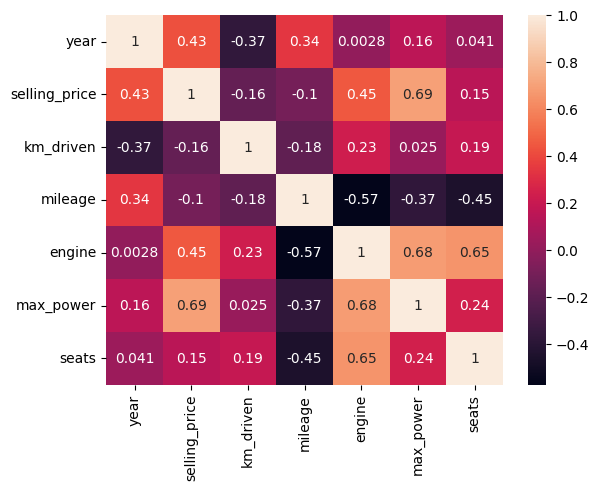

In [22]:
sns.heatmap(data=df_train_pearson, annot=True)

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Наиболее сильная положительная линейная зависимость наблюдается между максимальной мощностью и ценой, между максимальной мощностью и двигателем, между кол-вом сидений и двигателем. Наименее скоррелированы между собой признаки год и двигатель`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [x] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [x] Проинтерпретируйте результаты

In [57]:
def spearman_correlation(x: np.ndarray, y: np.ndarray) -> float:
    x = np.array(x)
    y = np.array(y)
    
    x_ranks = np.argsort(np.argsort(x))
    y_ranks = np.argsort(np.argsort(y))
    
    n = len(x_ranks)
    covariance = np.sum((x_ranks - np.mean(x_ranks)) * (y_ranks - np.mean(y_ranks))) / n
    std_x = np.std(x_ranks, ddof=0)
    std_y = np.std(y_ranks, ddof=0)
    
    return covariance / (std_x * std_y)

x = [13410, 2056, 352, 40, 510]
y = [155, 256, 3541623, 415, 50]

print(spearman_correlation(x, y))
display(pd.DataFrame(data=[x,y]).T.corr(method='spearman'))

-0.5999999999999999
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/

     0    1
0  1.0 -0.6
1 -0.6  1.0

/home/boyarskikhae/.local/lib/python3.13/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


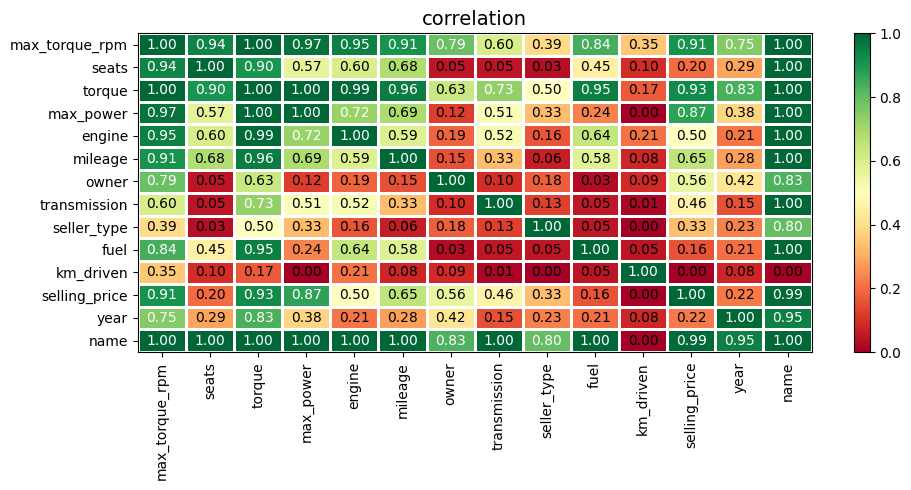

In [24]:
import phik
from phik.report import plot_correlation_matrix


df_phik = df_train.phik_matrix(
    interval_cols=['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'],
    njobs=-1
)
plot_correlation_matrix(
    df_phik.values,
    x_labels=df_phik.columns,
    y_labels=df_phik.index,
    vmin=0,
    vmax=1,
    figsize=(10, 5)
)

`По матрице корреляций phik мы видим новые корреляции категориальных признаков, которые почти все сильно коррелируют друг с другом`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

`Самая сильная корреляция у мощности и цены, нужно провести первичную оценку`

<Axes: >

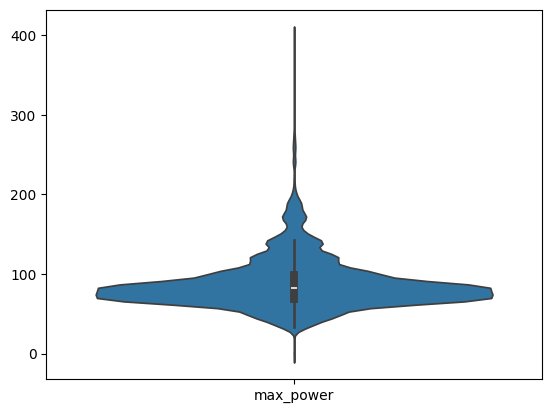

In [25]:
sns.violinplot(data=df_train[['max_power']])

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [58]:
df_train_numeric = df_train.select_dtypes(exclude='object').copy()
df_test_numeric = df_test.select_dtypes(exclude='object').copy()

In [59]:
y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns=['selling_price'])

In [61]:
assert X_train.shape == (5840, 6)

In [62]:
y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns=['selling_price'])

In [63]:
assert X_test.shape == (1000, 6)

### **Задание 12 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [64]:
def business_metrics(y_true, y_pred) -> float:
    errors = np.abs(y_pred - y_true) / y_true

    return np.sum(errors <= 0.1) / len(y_true)

In [68]:
def my_business_metrics(y_true, y_pred, penalty: float=2) -> float:
    underpredictions = y_pred < y_true
    overpredictions = y_pred >= y_true

    underpredictions_ratio = np.sum(underpredictions) / len(y_true) * penalty
    overpredictions_ratio = np.sum(overpredictions) / len(y_true)

    return underpredictions_ratio + overpredictions_ratio

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score


model = LinearRegression()

model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('RMSE =', MSE(y_true=y_test, y_pred=y_pred, squared=False))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('Моя метрика =', my_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

R^2 = 0.5941419681125422
MSE = 233298786264.12912
RMSE = 483010.13060196687
Business metric = 0.227
Моя метрика = 1.6975000000000002


`По MSE и RMSE тяжело делать какие-то выводы, поэтому в данном случае предпочтительнее смотреть на R^2 который довольно хорошо описывает дисперсию целевой переменной в рамках первой итерации формирования прогноза`

### **Задание 13 (0.15 балла)**

- [x] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [75]:
def my_r2(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return 1 - ((np.sum((y_pred - y_true) ** 2)) / (np.sum((y_true - np.mean(y_true)) ** 2)))

print('Самописная функция R^2 =', my_r2(y_true=y_test, y_pred=y_pred))

Самописная функция R^2 = 0.5941419681125422


`В числителе сумма разниц прогноза с фактом возведенные в квадрат, а в знаменателе сумма разниц между действительным значением и средним значением в квадрате. То есть доля дисперсии целевой переменной, объясняемую моделью.`

### **Бонус (0.15 балла)**

- [x] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [x] Объясните, когда применяется $\text{adjusted}-R^2$?

In [78]:
def adjusted_r2(y_true: np.ndarray, y_pred: np.ndarray, num_predictors: int) -> float:
    n = len(y_true)
    
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    
    r2 = 1 - (ss_residual / ss_total)
    
    r2_adj = 1 - ((1 - r2) * (n - 1) / (n - num_predictors - 1))
    
    return r2_adj


y_true = np.array([1, 1.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
num_predictors = 2


r2_adj = adjusted_r2(y_true, y_pred, num_predictors)
print("Adjusted R^2:", r2_adj)

Adjusted R^2: 0.28840970350404305


`Adjusted R^2 улучшает интерпретацию R^2 при наличии нескольких независимых переменных. В отличие от обычного R2R2, который всегда увеличивается при добавлении новых предикторов, adjusted R^2 учитывает сложность модели (количество весов) и штрафует за добавление лишних предикторов.`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [81]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X=X_train)
X_test_scaled = scaler.transform(X=X_test)


model = LinearRegression()

model.fit(X=X_train_scaled, y=y_train)
y_pred = model.predict(X=X_test_scaled)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('Моя метрика =', my_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

R^2 = 0.5941419681125579
MSE = 233298786264.12003
Business metric = 0.227
Моя метрика = 1.6975000000000002


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [86]:
X_train.columns[model.coef_.argmax()]

'max_power'

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [87]:
from sklearn.linear_model import Lasso


model = Lasso()

model.fit(X=X_train_scaled, y=y_train)
y_pred = model.predict(X=X_test_scaled)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('RMSE =', MSE(y_true=y_test, y_pred=y_pred, squared=False))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('Моя метрика =', my_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

R^2 = 0.5941407998542256
MSE = 233299457812.36975
RMSE = 483010.8257714
Business metric = 0.227
Моя метрика = 1.6975000000000002


`Улучшение в метриках не наблюдается`

In [88]:
model.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

`Так как модель не занулила ни один из весов, тогда получается что каждый признак является веьсма информативным и полезным при решении нашей задачи`

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [93]:
%%time

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


model = Lasso()

CV = 10

param_grid = {
    'alpha': np.arange(start=1, stop=30, step=0.5, dtype=int) 
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=CV)

grid_search.fit(X=X_train_scaled, y=y_train)
y_pred = grid_search.predict(X=X_test_scaled)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('RMSE =', MSE(y_true=y_test, y_pred=y_pred, squared=False))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('Моя метрика =', your_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

print(grid_search.best_params_)
print(grid_search.best_estimator_.coef_)

R^2 = 0.5941407998542256
MSE = 233299457812.36975
RMSE = 483010.8257714
Business metric = 0.227
Моя метрика = 1.6975000000000002
{'alpha': 1}
[152772.3902142  -44157.68985794  28832.04339588  61173.66240922
 322808.23691947 -23206.25564908]
CPU times: user 483 ms, sys: 326 ms, total: 809 ms
Wall time: 3.41 s


`При переборе брал только альфу. Лучший коэффициент регуляризации - 1. Грид-сёрч обучает модель за 809ms`

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [95]:
%%time


model = ElasticNet()


param_grid = {
    'alpha': np.arange(start=1, stop=10, step=0.5, dtype=int),
    'l1_ratio': np.arange(start=0.1, stop=1, step=0.1, dtype=float)
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=CV)

grid_search.fit(X=X_train_scaled, y=y_train)
y_pred = grid_search.predict(X=X_test_scaled)


print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('Моя метрика =', my_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

print(grid_search.best_params_)

R^2 = 0.5722225171629227
MSE = 245898712593.88657
Business metric = 0.241
Моя метрика = 1.6900000000000002
{'alpha': 1, 'l1_ratio': 0.9}
CPU times: user 459 ms, sys: 272 ms, total: 730 ms
Wall time: 1.26 s


`Грид-сёрч обучает модель в среднем за 1.5s, лучшие гиперпараметры: l1_ratio - 0.9, alpha - 1`

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [100]:
from celer import Lasso as L0Lasso

model = L0Lasso()

param_grid = {
    'alpha': np.arange(start=1, stop=10, step=0.5, dtype=int),
    'tol': [1e-4, 1e-3, 1e-2]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=CV)


grid_search.fit(X=X_train_scaled, y=y_train)
y_pred = grid_search.predict(X=X_test_scaled)

print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('RMSE =', MSE(y_true=y_test, y_pred=y_pred, squared=False))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('Моя метрика =', my_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))


print(grid_search.best_params_)


R^2 = 0.5941408017618391
MSE = 233299456715.81906
RMSE = 483010.82463627984
Business metric = 0.227
Моя метрика = 1.6975000000000002
{'alpha': 1, 'tol': 0.0001}


`Результаты значимо не прирасли, коэффициент tolerance = 0.0001`

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [101]:
X_train_cat = df_train.select_dtypes(include='object').copy()
X_train_cat['brand'] = X_train_cat['name'].str.split().str[0]
X_train_cat.drop(columns=['name', 'torque', 'max_torque_rpm'], inplace=True)

X_test_cat = df_test.select_dtypes(include='object').copy()
X_test_cat['brand'] = X_test_cat['name'].str.split().str[0]
X_test_cat.drop(columns=['name', 'torque', 'max_torque_rpm'], inplace=True)

In [102]:
X_train_cat.describe(include='object')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Users/zapashniysergey/Library/Python/3.9/lib/python/

          fuel seller_type transmission        owner   brand
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     Diesel  Individual       Manual  First Owner  Maruti
freq      3177        5223         5336         3603    1804

### **Задание 20 (0.1 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [103]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int, handle_unknown='ignore')


X_train_cat = pd.DataFrame(encoder.fit_transform(X=X_train_cat))
X_test_cat = pd.DataFrame(encoder.transform(X=X_test_cat))


X_train_cat = pd.concat(objs=[pd.DataFrame(X_train), X_train_cat], axis=1)
X_train_cat.columns = X_train_cat.columns.astype(str)

X_test_cat = pd.concat(objs=[pd.DataFrame(X_test), X_test_cat], axis=1)
X_test_cat.columns = X_test_cat.columns.astype(str)

/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Обучать OHE необходимо на трейне. Столбец мы удаляем чтобы не наткнуться на проблему мультиколлинеарности и последующее плохое обучение модели. Считаю, что в рамках линейной модели можно удалять эти столбцы, но только после работы с ними, так как потенциальный эффект от признаков может быть выражен нелинейно`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [104]:
from sklearn.linear_model import Ridge


model = Ridge()


param_grid = {
    'alpha': np.arange(start=1, stop=10, step=0.5, dtype=int),
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', n_jobs=-1, cv=CV)

grid_search.fit(X=X_train_scaled, y=y_train)
y_pred = grid_search.predict(X=X_test_scaled)

print('R^2 =', r2_score(y_true=y_test, y_pred=y_pred))
print('MSE =', MSE(y_true=y_test, y_pred=y_pred))
print('RMSE =', MSE(y_true=y_test, y_pred=y_pred, squared=False))
print('Business metric =', business_metrics(y_true=y_test, y_pred=y_pred))
print('Моя метрика =', my_business_metrics(y_true=y_test, y_pred=y_pred, penalty=2.5))

R^2 = 0.5941043676145128
MSE = 233320400104.10263
RMSE = 483032.5041900417
Business metric = 0.227
Моя метрика = 1.6975000000000002


`Качество модели не удалось улучшить`

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

`Расчет реализован выше. Почти все модели получили сравнимый результат по этой метрике`

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [x] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

`Расчет реализован выше. Метрика выводит сумму недопрогнозов и перепрогнозов, но со штрафом для недопрогнозов. Чем меньше метрика, тем лучше. Все модели показали схожий результат по этой метрике`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List


app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

In [105]:
import pickle


with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>